#***Regression - Yes Bank Stock Closing Price Prediction***

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

## Data wrangling

In [203]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [206]:
# Changing the date format
def add(x):
  return "01-"+x

df['New Date'] = df['Date'].apply(add)

In [207]:
df['New Date'] = pd.to_datetime(df['New Date'], format= '%d-%b-%y')
df['New Date'].head()

,New Date
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01


In [208]:
# Deleting the old date column
df.drop('Date', axis = 1, inplace= True)

In [209]:
# Extracting year and month in a seperate column
df['Year'] = df['New Date'].dt.year
df['Month'] = df['New Date'].dt.month

In [210]:
# Creating a new column with the average of open, high, low price monthly
df['Average'] = df[['Open', 'High', 'Low']].mean(axis = 1).round(2)

In [211]:
# Check
df.head()

,Open,High,Low,Close,New Date,Year,Month,Average
0,13.00,14.00,11.25,12.46,2005-07-01,2005,7,12.75
1,12.58,14.88,12.55,13.42,2005-08-01,2005,8,13.34
2,13.48,14.87,12.27,13.30,2005-09-01,2005,9,13.54
3,13.20,14.47,12.40,12.99,2005-10-01,2005,10,13.36
4,13.35,13.88,12.88,13.41,2005-11-01,2005,11,13.37


##Exploratory Data Analysis (EDA)

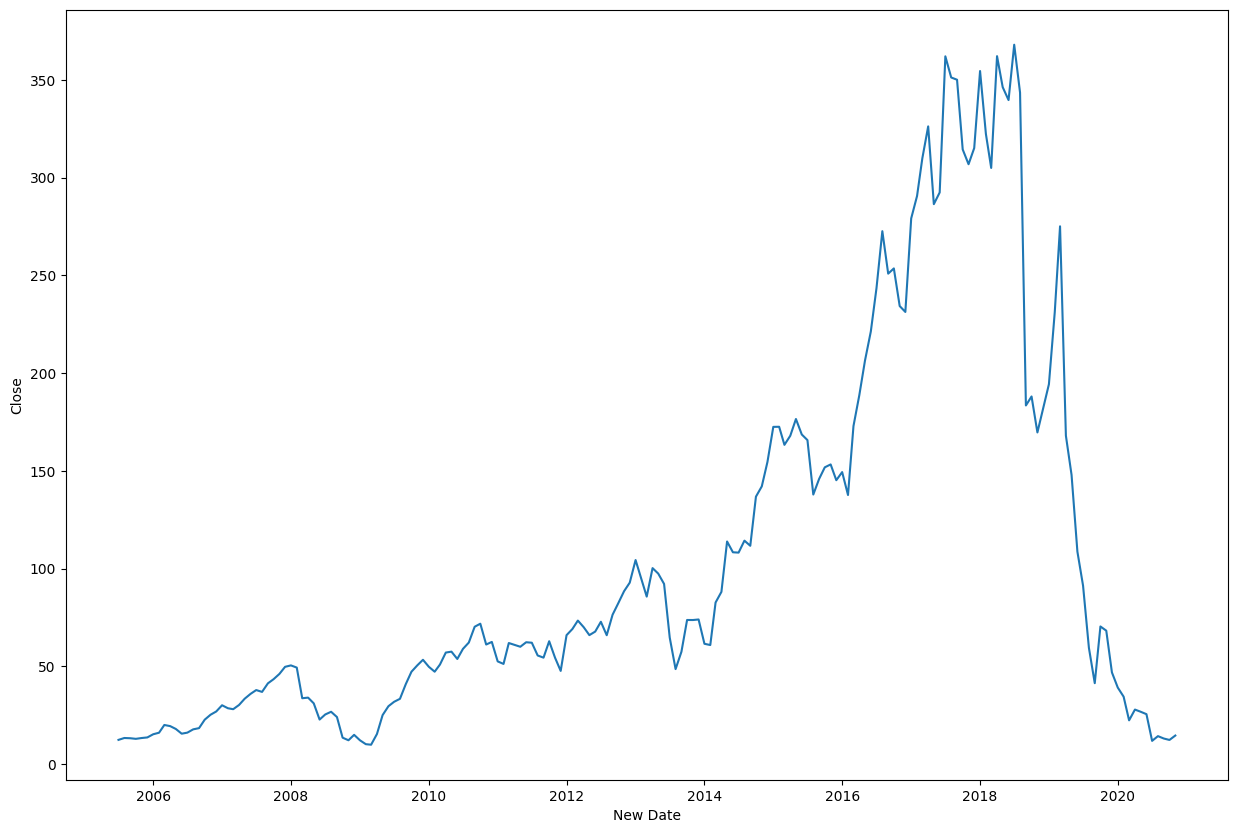

In [212]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = df['New Date'], y = df['Close'])
plt.show()

***Key Findings:***
1. **Uptrend (2006 - 2016)**:
   - The share price of Yes Bank exhibited a consistent uptrend during this period, indicating strong growth and investor confidence.

2. **Breakout Period (2016 - 2018)**:
   - From 2016 to 2018, the share experienced a breakout phase, marked by significant increases in price. This period highlights a phase of rapid growth and heightened investor interest.

3. **Exponential Decline (2018 - 2020)**:
   - Between 2018 and 2020, the share price witnessed an exponential decline. This sharp decrease was attributed to fraudulent activities by the company’s directors, which severely impacted investor confidence and the bank's financial stability.

4. **Consolidation Phase (Post-2020)**:
   - After 2020, the share price of Yes Bank returned to its original levels and entered a phase of consolidation.

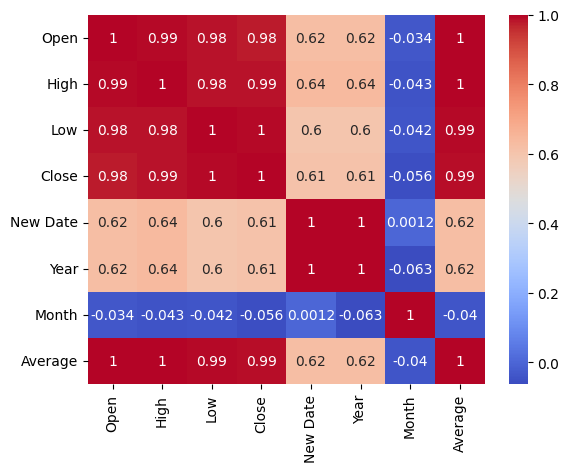

In [213]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

**Finding:**

Correlation Analysis of Stock Data

The correlation graph illustrates that the Open, High, Low, and Close prices of the stock are highly correlated with each other. This indicates that changes in one of these price metrics are likely to be associated with similar changes in the others.

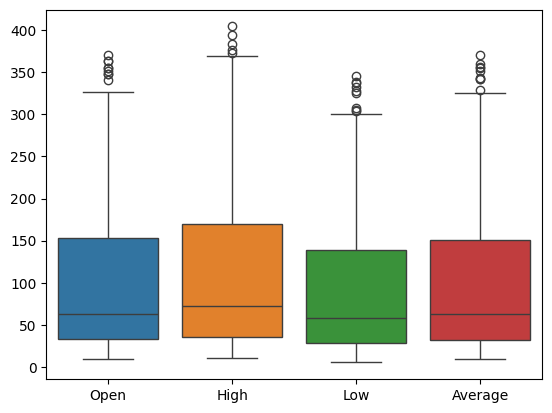

In [216]:
sns.boxplot(df[['Open', 'High', 'Low', 'Average']])
plt.show()

**Finding:**
Outlier Analysis and Log Transformation

The figure suggests the presence of outliers in the upper bound area of the dataset. To address this, we will apply a log transformation to the data. This transformation will help to compress the range of values and potentially mitigate the impact of these outliers. After applying the log transformation, we will re-evaluate the graph to determine if the outliers have been reduced or removed, thereby enhancing the robustness of our analysis.

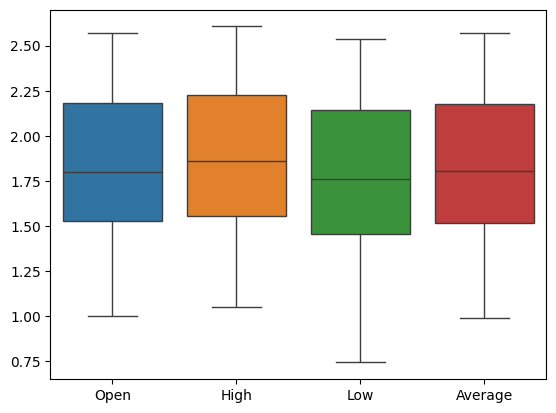

In [217]:
log_plot = np.log10(df[['Open', 'High', 'Low', 'Average']])
sns.boxplot(log_plot)
plt.show()

**Finding:**

As we can clearly visualize that outliers are completely removed by Log Transformation

#**Feature Engineering**

In [218]:
# Dividing the dataset into dependent and independent variables

x = df[['Open', 'High', 'Low', 'Month', 'Year', 'Average']]
y = df['Close']

In [219]:
# Log Transformation of both the variables

X = np.log10(x).values
Y = np.log10(y).values

In [221]:
# Splitting the data fortrain and test for cross verification

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [222]:
# Scaling the data only the independent variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#***Model - 1***
#**Linear Regression**

In [224]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

In [225]:
y_predict = 10**Y_predict
y_test = 10**Y_test

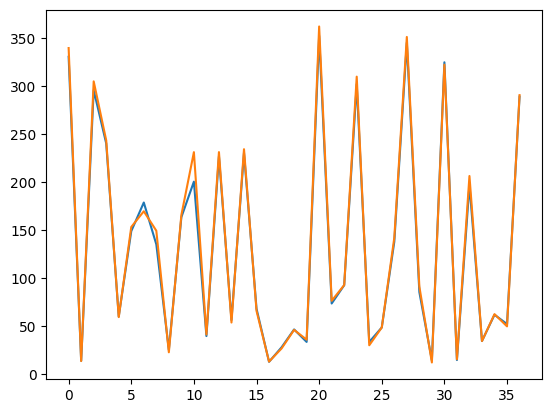

In [226]:
import matplotlib.pyplot as plt
plt.plot(y_predict)
plt.plot(y_test)
plt.show()

In [227]:
squared_diff = sum((y_test - y_predict)**2)
n = len(y_predict)

mse = squared_diff/n
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 50.186326052471


In [228]:
rmse = (mse)**1/2
print(f"Root Mean Square Error is : {rmse:.2f}")

Root Mean Square Error is : 25.09


In [229]:
# Evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predict)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 4.06%


In [230]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_predict)
print(f"R-Squared: {r2:.2f}")

R-Squared: 1.00


#***Model - 2***
# Ridge Regression

In [231]:
from sklearn.linear_model import Ridge
model = Ridge()

from sklearn.model_selection import GridSearchCV
parameter = {'alpha': [0.1, 0.2, 0.05, 0.3, 0.4, 0.5]}

In [232]:
ridge_regression = GridSearchCV(model, parameter, cv=5)
ridge_regression.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.05, 0.3, 0.4, 0.5]})

In [233]:
print("Best parameters found: ", ridge_regression.best_params_)
print("Best cross-validation score: ", ridge_regression.best_score_)

Best parameters found:  {'alpha': 0.05}
Best cross-validation score:  0.9912439452943845


In [234]:
Y_predict = ridge_regression.predict(X_test)

In [235]:
y_predict = 10**Y_predict
y_test = 10**Y_test

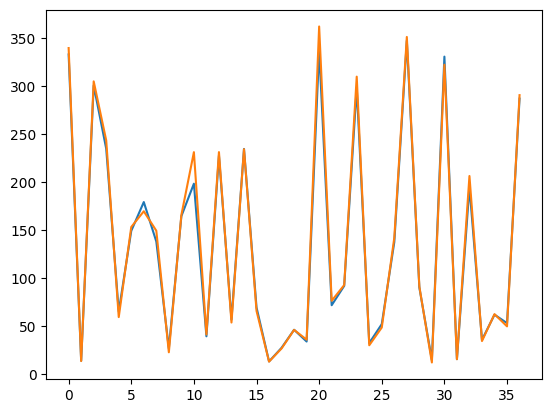

In [236]:
import matplotlib.pyplot as plt
plt.plot(y_predict)
plt.plot(y_test)
plt.show()

In [237]:
squared_diff = sum((y_test - y_predict) ** 2)
n = len(y_predict)
mse = squared_diff / n
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 69.42980665855693


In [238]:
rmse = (mse)**1/2
print(f"Root Mean Square Error is : {rmse:.2f}")

Root Mean Square Error is : 34.71


In [239]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, y_predict)
print(f"MAE: {mae:.2f}")

MAE: 5.18


In [240]:
# Evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predict)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 4.72%


In [241]:
r2 = r2_score(y_test, y_predict)
print(f"R-Squared: {r2:.2f}")

R-Squared: 0.99


#***Model - 3***
#Lasso Regression

In [152]:
from sklearn.linear_model import Lasso
model = Lasso()

from sklearn.model_selection import GridSearchCV
parameter = {'alpha': [0.0001, 0.0002, 0.0005, 0.003, 0.04, 0.5]}

In [153]:
lasso_regression = GridSearchCV(model, parameter, cv=5)
lasso_regression.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.003, 0.04, 0.5]})

In [154]:
print("Best parameters found: ", lasso_regression.best_params_)
print("Best cross-validation score: ", lasso_regression.best_score_)

Best parameters found:  {'alpha': 0.0001}
Best cross-validation score:  0.992758540110837


In [155]:
Y_predict = lasso_regression.predict(X_test)

In [158]:
y_predict = 10**Y_predict
y_test = 10**Y_test

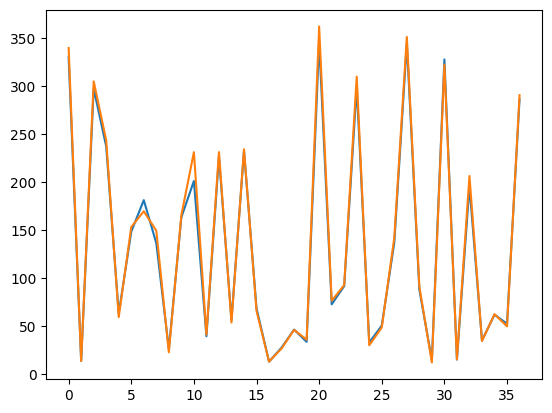

In [161]:
import matplotlib.pyplot as plt
plt.plot(y_predict)
plt.plot(y_test)
plt.show()

In [162]:
squared_diff = sum((y_test - y_predict) ** 2)
n = len(y_predict)
mse = squared_diff / n
print(f"Mean Squared Error is: {mse}")

Mean Squared Error is: 57.806676141108355


In [163]:
rmse = (mse)**1/2
print(f"Root Mean Square Error is : {rmse:.2f}")

Root Mean Square Error is : 28.90


In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, y_predict)
print(f"MAE: {mae:.2f}")

MAE: 5.06


In [165]:
# Evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predict)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 4.49%


In [166]:
r2 = r2_score(y_test, y_predict)
print(f"R-Squared: {r2:.2f}")

R-Squared: 1.00


#***Model - 4***
#Random Forest (Bagging)

In [197]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter tuning

regressor = RandomForestRegressor()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
regressor = GridSearchCV(regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
regressor.fit(X_train, Y_train)          # have patience takes 10mins to run

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [198]:
test_preds  = regressor.predict(X_test)

In [199]:
y_predict = 10**test_preds
y_test = 10**Y_test

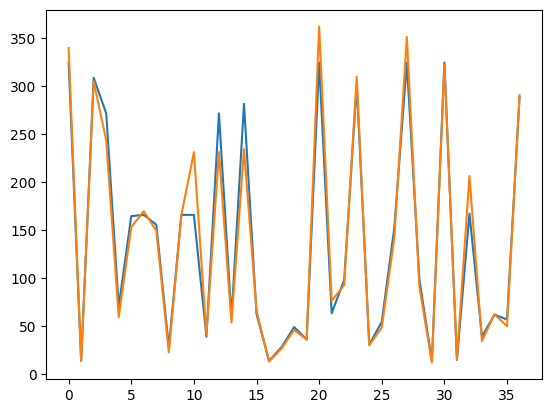

In [200]:
plt.plot(y_predict)
plt.plot(y_test)
plt.show()

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mae = mean_absolute_error(Y_test, test_preds)
print(f"MAE: {mae:.2f}")

MAE: 0.04


In [189]:
r2 = r2_score(y_test, y_predict)
print(f"R-Squared: {r2:.2f}")

R-Squared: 0.97


In [191]:
# Evaluate the model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predict)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 9.28%


In [190]:
rmse = (mse)**1/2
print(f"Root Mean Square Error is : {rmse:.2f}")

Root Mean Square Error is : 28.90


#***Model - 5.1***
# XG Boost (Boosting)
## Without Hyperparameter optimization

In [192]:
pip install xgboost

In [193]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor model
xgb_regressor = XGBRegressor(
    n_estimators=100,    # Number of boosting rounds
    learning_rate=0.1,   # Step size shrinkage
    max_depth=3,         # Maximum tree depth for base learners
    subsample=0.8,       # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Fit the model
xgb_regressor.fit(X_train, Y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Absolute Error: 0.0249
Mean Squared Error: 0.0011
Root Mean Squared Error: 0.0338
R-squared: 0.9945


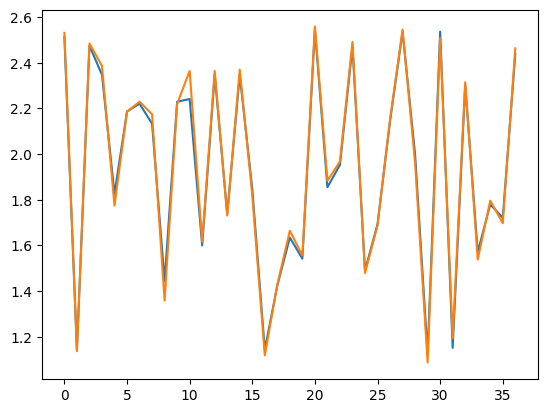

In [194]:
plt.plot(y_pred)
plt.plot(Y_test)
plt.show()

#***Model - 5.2***
# XG Boost (Boosting)
## With Hyperparameter optimization

In [195]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Metric to evaluate the model
    verbose=1,  # Print progress messages
    n_jobs=-1   # Use all available CPUs
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # neg_mean_squared_error is negative, so negate it

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score:.4f}")

# Fit the best model
best_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(Y_test, y_pred_best)
mse_best = mean_squared_error(Y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(Y_test, y_pred_best)

print(f"Mean Absolute Error (Best Model): {mae_best:.4f}")
print(f"Mean Squared Error (Best Model): {mse_best:.4f}")
print(f"Root Mean Squared Error (Best Model): {rmse_best:.4f}")
print(f"R-squared (Best Model): {r2_best:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best Score (MSE): 0.0031
Mean Absolute Error (Best Model): 0.0249
Mean Squared Error (Best Model): 0.0013
Root Mean Squared Error (Best Model): 0.0364
R-squared (Best Model): 0.9936


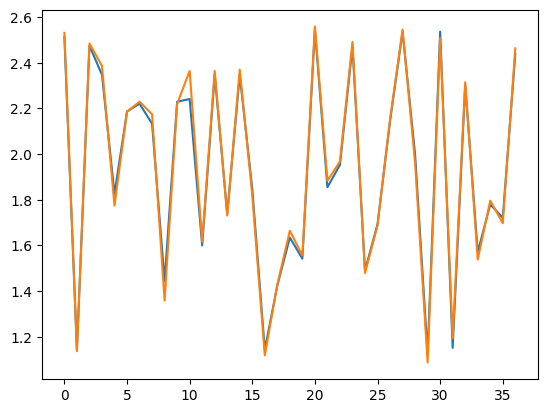

In [196]:
plt.plot(y_pred)
plt.plot(Y_test)
plt.show()